In [1]:
import pandas as pd
import matplotlib.pyplot as plt


data = pd.read_csv("./CAR DETAILS FROM CAR DEKHO.csv")
data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


### 행과 열 개수 확인

In [2]:
print(f"data 행과 열의 개수: {data.shape}")
print(data.columns)


data 행과 열의 개수: (4340, 8)
Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')


### 수치형 데이터 확인

In [3]:
data.select_dtypes(int64).columns

NameError: name 'int64' is not defined

### 범주형 데이터 확인

In [4]:
data.select_dtypes(object).columns

Index(['name', 'fuel', 'seller_type', 'transmission', 'owner'], dtype='object')

In [5]:
print(len(data.select_dtypes(object).columns))

5


# 결측치 확인
----------------------------------------------

In [6]:
data.info() #결측값이 없음 #히스토그램 뽑아보기

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [7]:
data.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [8]:
data.notnull().sum()

name             4340
year             4340
selling_price    4340
km_driven        4340
fuel             4340
seller_type      4340
transmission     4340
owner            4340
dtype: int64

**int형 데이터 결측값 히스토그램**
 - int형 데이터의 결측값은 없다.

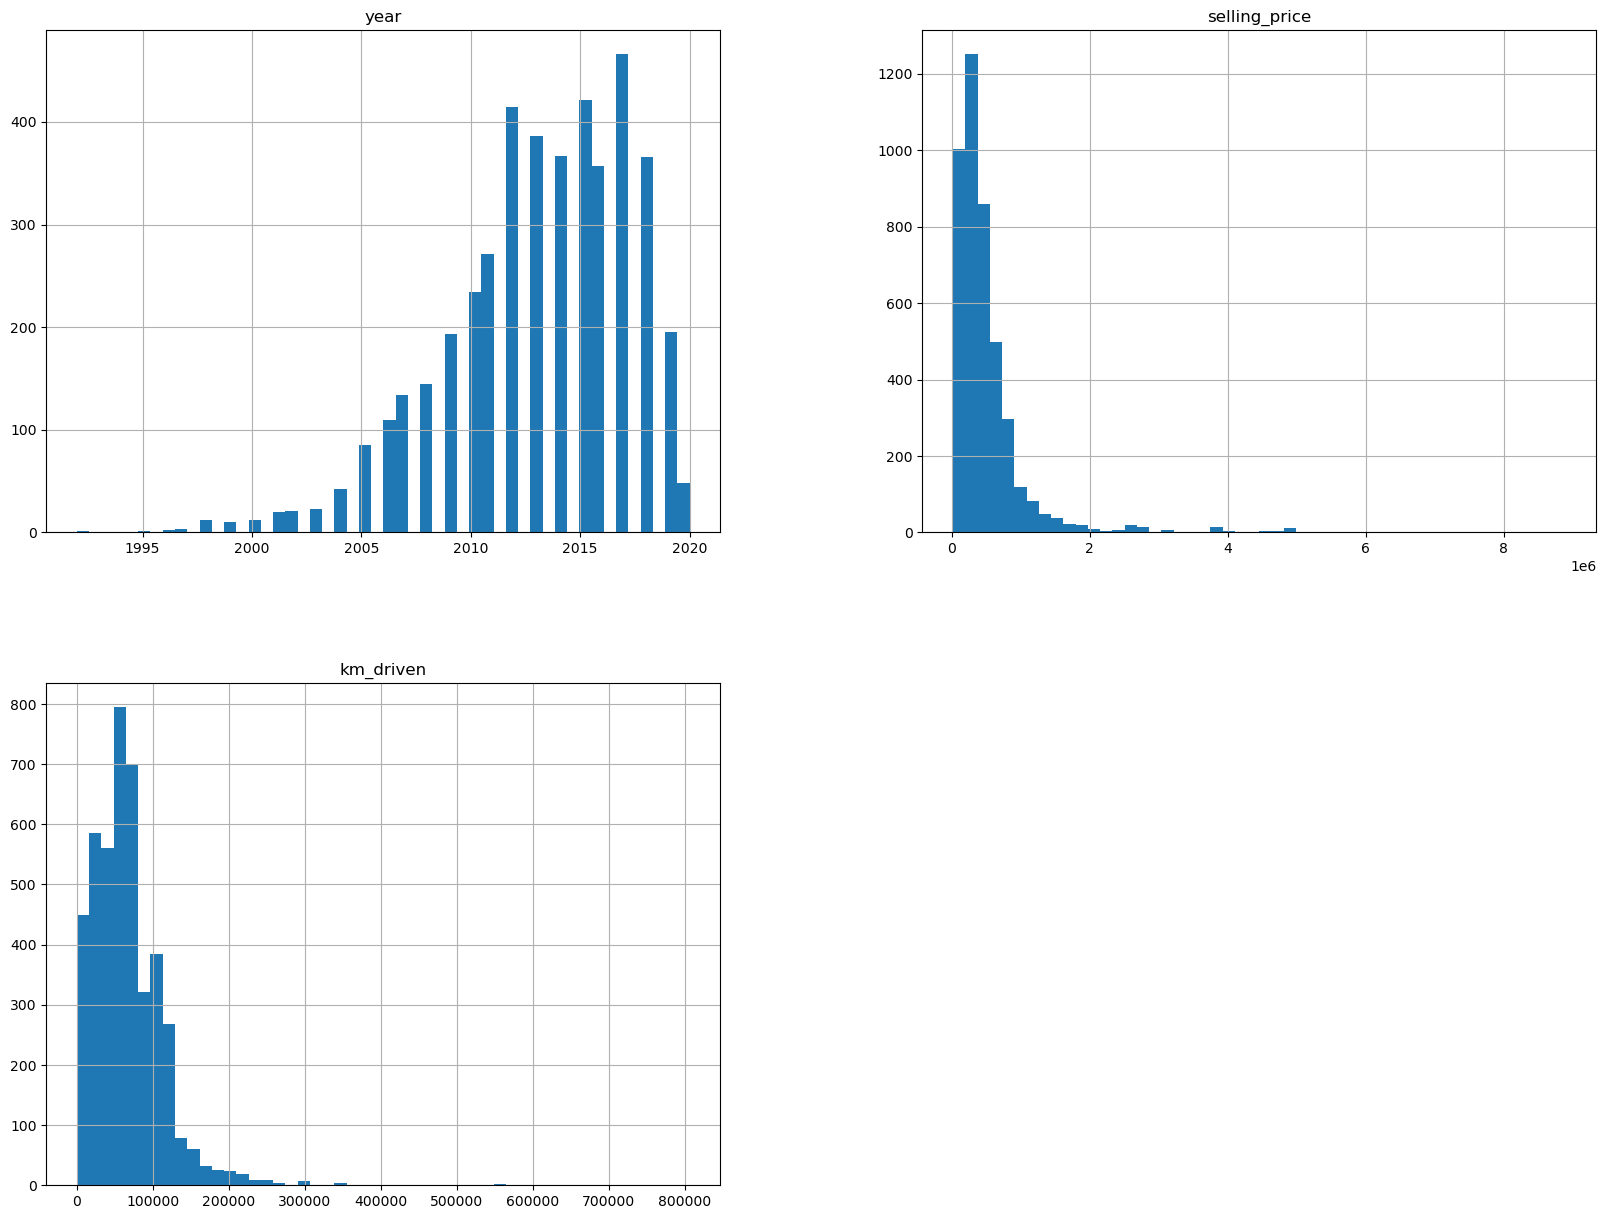

In [9]:
%matplotlib inline

data.hist(bins=50, figsize=(20,15))
#save_fig("attribute_histogram_plots")       #int형 데이터에 결측값 없음
#plt.savefig('histogram_int.jpg')
plt.show()

**objest(str)타입 데이터 결측갑 결과**
   - 결측값이 없다.

In [10]:
column_type_str = ['name','fuel','seller_type','transmission','owner']
for i in column_type_str:
    Miss = len(data.loc[data[i] == '0'])
    print(f'Miss_{i}: {Miss}')

Miss_name: 0
Miss_fuel: 0
Miss_seller_type: 0
Miss_transmission: 0
Miss_owner: 0


In [11]:
column_type_int = ['year','selling_price']
for i in column_type_int:
    Miss = len(data.loc[data[i] == 0])
    print(f'Miss_{i}: {Miss}')

Miss_year: 0
Miss_selling_price: 0


# 1번
-------------------------------------------------

In [12]:
year_sort = data['year'].sort_values()  #년도를 정렬한 결과 1992년식부터 ~ 2020년식까지 있음
print(year_sort)

3334    1992
631     1995
2972    1996
61      1996
1669    1997
        ... 
2137    2020
1432    2020
1774    2020
176     2020
3933    2020
Name: year, Length: 4340, dtype: int64


In [13]:
i = 1992
sum = 0

while i < 2021:
    result = len(data.loc[data['year'] == i])
    print(f"{i}년식 = {result} 대")
    sum += result
    i+= 1

print(f"총합 = {sum} 대")   #년도별 결과 , 총합 4340개로 column의 갯수와 맞음

1992년식 = 1 대
1993년식 = 0 대
1994년식 = 0 대
1995년식 = 1 대
1996년식 = 2 대
1997년식 = 3 대
1998년식 = 12 대
1999년식 = 10 대
2000년식 = 12 대
2001년식 = 20 대
2002년식 = 21 대
2003년식 = 23 대
2004년식 = 42 대
2005년식 = 85 대
2006년식 = 110 대
2007년식 = 134 대
2008년식 = 145 대
2009년식 = 193 대
2010년식 = 234 대
2011년식 = 271 대
2012년식 = 415 대
2013년식 = 386 대
2014년식 = 367 대
2015년식 = 421 대
2016년식 = 357 대
2017년식 = 466 대
2018년식 = 366 대
2019년식 = 195 대
2020년식 = 48 대
총합 = 4340 대


In [14]:
groups = data.groupby('year')
groups.size()

year
1992      1
1995      1
1996      2
1997      3
1998     12
1999     10
2000     12
2001     20
2002     21
2003     23
2004     42
2005     85
2006    110
2007    134
2008    145
2009    193
2010    234
2011    271
2012    415
2013    386
2014    367
2015    421
2016    357
2017    466
2018    366
2019    195
2020     48
dtype: int64

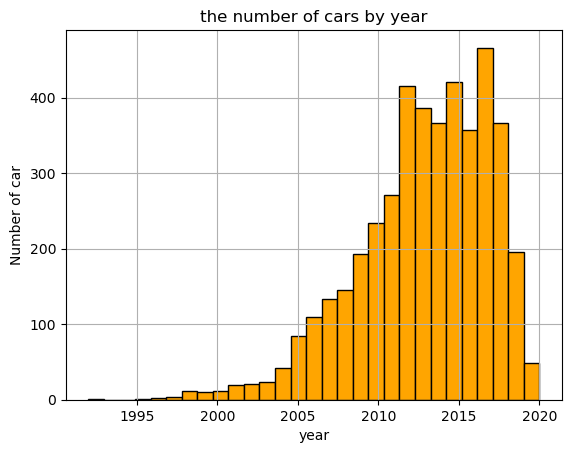

In [15]:
data['year'].plot(kind='hist', bins = 29, color='orange',edgecolor='k',grid=True)
plt.title('the number of cars by year')
plt.ylabel('Number of car',size=10)
plt.xlabel('year',size=10)
plt.savefig('the number of cars by year.jpg')
plt.show()

In [16]:
#data['year'].value_counts().plot(kind='bar')

# 2번

In [17]:
M_price = data.groupby(['year'])['selling_price'].mean()
print(M_price)

year
1992    5.000000e+04
1995    9.500000e+04
1996    2.250000e+05
1997    9.300000e+04
1998    2.140000e+05
1999    7.350000e+04
2000    8.150000e+04
2001    1.176499e+05
2002    9.071429e+04
2003    8.656522e+04
2004    1.217500e+05
2005    1.090130e+05
2006    1.577999e+05
2007    1.628284e+05
2008    1.742013e+05
2009    2.295647e+05
2010    2.696781e+05
2011    2.936383e+05
2012    3.716289e+05
2013    4.848010e+05
2014    5.232316e+05
2015    5.289430e+05
2016    6.083641e+05
2017    7.689098e+05
2018    9.107705e+05
2019    1.059020e+06
2020    8.184791e+05
Name: selling_price, dtype: float64


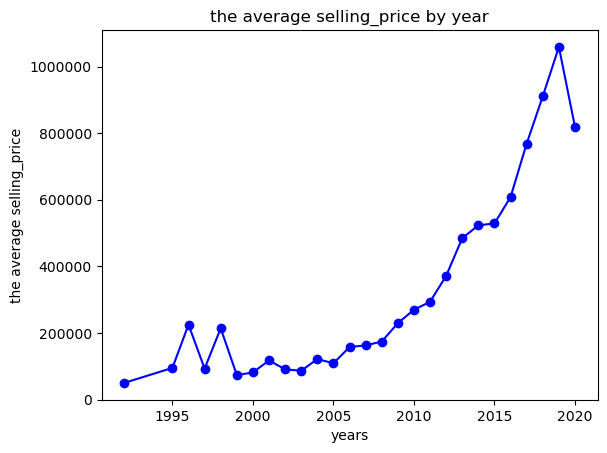

In [18]:
plt.title('the average selling_price by year')
plt.ticklabel_format(style='plain')
plt.xlabel('years')
plt.ylabel('the average selling_price')
plt.plot(M_price,color='blue',marker='o')
plt.savefig('the average selling_price by year.jpg')

# 3번

In [19]:
#data['name'].str.split(" ").head()
data['brand']=data.name.str.split(' ').str[0]
data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda
...,...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner,Hyundai
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner,Hyundai
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner,Maruti
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner,Hyundai


In [20]:
#data.info() # brand 결측값이 없음
data['brand'].isnull().sum()

0

In [21]:
 Miss = len(data.loc[data['brand'] == '0'])
print(f'Miss_brand: {Miss}')

Miss_brand: 0


In [22]:
# groups_brand = data.groupby('brand')
# groups_brand.size()

In [23]:
# brand_count=data.groupby('brand').size()
# print(brand_count)
# print(brand_count.index)
# brand_idx = brand_count.index.to_list()
# print(brand_idx)
# print(type(brand_idx))
# brand_count=data.groupby('brand').size()
# print(list(brand_count))

In [24]:
brand_count_sort=data.groupby('brand').size().sort_values(ascending=False)
print(brand_count_sort)
print(brand_count_sort.index)

brand
Maruti           1280
Hyundai           821
Mahindra          365
Tata              361
Honda             252
Ford              238
Toyota            206
Chevrolet         188
Renault           146
Volkswagen        107
Skoda              68
Nissan             64
Audi               60
BMW                39
Fiat               37
Datsun             37
Mercedes-Benz      35
Mitsubishi          6
Jaguar              6
Land                5
Ambassador          4
Volvo               4
Jeep                3
OpelCorsa           2
MG                  2
Isuzu               1
Force               1
Daewoo              1
Kia                 1
dtype: int64
Index(['Maruti', 'Hyundai', 'Mahindra', 'Tata', 'Honda', 'Ford', 'Toyota',
       'Chevrolet', 'Renault', 'Volkswagen', 'Skoda', 'Nissan', 'Audi', 'BMW',
       'Fiat', 'Datsun', 'Mercedes-Benz', 'Mitsubishi', 'Jaguar', 'Land',
       'Ambassador', 'Volvo', 'Jeep', 'OpelCorsa', 'MG', 'Isuzu', 'Force',
       'Daewoo', 'Kia'],
      dtype='ob

In [25]:
brand_count_idx = brand_count_sort.index.to_list()
brand_count_value = list(brand_count_sort)
# print(brand_count_idx)
# print(brand_count_value)

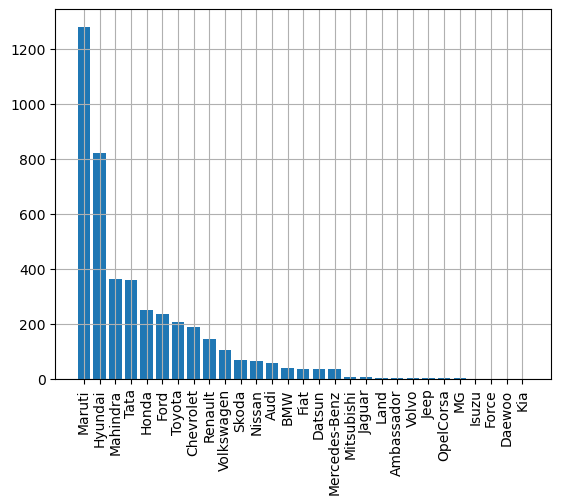

In [26]:
plt.bar(brand_count_idx,brand_count_value,width= 0.8)
plt.xticks(rotation = 90)
plt.grid()
plt.show()

In [27]:
# group_brand = data.groupby(['brand']).size().rename('count').to_frame()
# #print(group_brand)
# group_brand


# 4번

In [28]:
print(data['selling_price'].sort_values())

2662      20000
2495      22000
2444      30000
3206      35000
2849      35000
         ...   
1023    4950000
2239    4950000
3969    5500000
89      8150000
3872    8900000
Name: selling_price, Length: 4340, dtype: int64


### 범주형 데이터 처리

In [29]:
data.select_dtypes(object).columns

Index(['name', 'fuel', 'seller_type', 'transmission', 'owner', 'brand'], dtype='object')

#### (1) brand(name)

In [30]:
group_brandd = data.groupby('brand').size()
brandd_idx = group_brandd.index.to_list()
print(brandd_idx)
print(len(brandd_idx))

['Ambassador', 'Audi', 'BMW', 'Chevrolet', 'Daewoo', 'Datsun', 'Fiat', 'Force', 'Ford', 'Honda', 'Hyundai', 'Isuzu', 'Jaguar', 'Jeep', 'Kia', 'Land', 'MG', 'Mahindra', 'Maruti', 'Mercedes-Benz', 'Mitsubishi', 'Nissan', 'OpelCorsa', 'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo']
29


In [31]:
print(group_brandd)

brand
Ambassador          4
Audi               60
BMW                39
Chevrolet         188
Daewoo              1
Datsun             37
Fiat               37
Force               1
Ford              238
Honda             252
Hyundai           821
Isuzu               1
Jaguar              6
Jeep                3
Kia                 1
Land                5
MG                  2
Mahindra          365
Maruti           1280
Mercedes-Benz      35
Mitsubishi          6
Nissan             64
OpelCorsa           2
Renault           146
Skoda              68
Tata              361
Toyota            206
Volkswagen        107
Volvo               4
dtype: int64


#### (2) fuel

In [32]:
group_fuel = data.groupby('fuel').size()
fuel_idx = group_fuel.index.to_list()
print(fuel_idx)
print(len(fuel_idx))

['CNG', 'Diesel', 'Electric', 'LPG', 'Petrol']
5


In [33]:
print(group_fuel)

fuel
CNG           40
Diesel      2153
Electric       1
LPG           23
Petrol      2123
dtype: int64


#### (3) seller_type

In [34]:
group_seller_type = data.groupby('seller_type').size()
seller_type_idx = group_seller_type.index.to_list()
print(seller_type_idx)
print(len(seller_type_idx))

['Dealer', 'Individual', 'Trustmark Dealer']
3


In [35]:
print(group_seller_type)

seller_type
Dealer               994
Individual          3244
Trustmark Dealer     102
dtype: int64


#### (4) transmission

In [36]:
group_transmission = data.groupby('transmission').size()
transmission_idx = group_transmission.index.to_list()
print(transmission_idx)
print(len(transmission_idx))

['Automatic', 'Manual']
2


In [37]:
print(group_transmission)

transmission
Automatic     448
Manual       3892
dtype: int64


#### (5) owner

In [38]:
group_owner = data.groupby('owner').size()
owner_idx = group_owner.index.to_list()
print(owner_idx)
print(len(owner_idx))

['First Owner', 'Fourth & Above Owner', 'Second Owner', 'Test Drive Car', 'Third Owner']
5


In [39]:
print(group_owner)

owner
First Owner             2832
Fourth & Above Owner      81
Second Owner            1106
Test Drive Car            17
Third Owner              304
dtype: int64


### 4 -1 name(brand)    [1~29]로 매핑

In [40]:
data = data.replace({'Ambassador':1, 'Audi':2, 'BMW':3, 'Chevrolet':4, 'Daewoo':5, 'Datsun':6, 'Fiat':7, 'Force':8, 'Ford':9, 'Honda':10, 'Hyundai':11, 'Isuzu':12, 'Jaguar':13, 'Jeep':14, 'Kia':15, 'Land':16, 'MG':17, 'Mahindra':18, 'Maruti':19, 'Mercedes-Benz':20, 'Mitsubishi':21, 'Nissan':22, 'OpelCorsa':23, 'Renault':24, 'Skoda':25, 'Tata':26, 'Toyota':27, 'Volkswagen':28, 'Volvo':29})
data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,19
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,19
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,11
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,6
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,10
...,...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner,11
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner,11
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner,19
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner,11


In [41]:
group_brand_change = data.groupby('brand').size()
print(group_brand_change)

brand
1        4
2       60
3       39
4      188
5        1
6       37
7       37
8        1
9      238
10     252
11     821
12       1
13       6
14       3
15       1
16       5
17       2
18     365
19    1280
20      35
21       6
22      64
23       2
24     146
25      68
26     361
27     206
28     107
29       4
dtype: int64


### 4-2 fuel [50~54]매핑

In [42]:
data = data.replace({'CNG':50, 'Diesel':51, 'Electric':52, 'LPG':53, 'Petrol':54})
data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand
0,Maruti 800 AC,2007,60000,70000,54,Individual,Manual,First Owner,19
1,Maruti Wagon R LXI Minor,2007,135000,50000,54,Individual,Manual,First Owner,19
2,Hyundai Verna 1.6 SX,2012,600000,100000,51,Individual,Manual,First Owner,11
3,Datsun RediGO T Option,2017,250000,46000,54,Individual,Manual,First Owner,6
4,Honda Amaze VX i-DTEC,2014,450000,141000,51,Individual,Manual,Second Owner,10
...,...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,51,Individual,Manual,Second Owner,11
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,51,Individual,Manual,Second Owner,11
4337,Maruti 800 AC BSIII,2009,110000,83000,54,Individual,Manual,Second Owner,19
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,51,Individual,Manual,First Owner,11


In [43]:
group_fuel_change = data.groupby('fuel').size()
print(group_fuel_change)

fuel
50      40
51    2153
52       1
53      23
54    2123
dtype: int64


### 4-3 seller_type [60~62] 메핑

In [44]:
data = data.replace({'Dealer':60, 'Individual':61, 'Trustmark Dealer':62})
data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand
0,Maruti 800 AC,2007,60000,70000,54,61,Manual,First Owner,19
1,Maruti Wagon R LXI Minor,2007,135000,50000,54,61,Manual,First Owner,19
2,Hyundai Verna 1.6 SX,2012,600000,100000,51,61,Manual,First Owner,11
3,Datsun RediGO T Option,2017,250000,46000,54,61,Manual,First Owner,6
4,Honda Amaze VX i-DTEC,2014,450000,141000,51,61,Manual,Second Owner,10
...,...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,51,61,Manual,Second Owner,11
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,51,61,Manual,Second Owner,11
4337,Maruti 800 AC BSIII,2009,110000,83000,54,61,Manual,Second Owner,19
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,51,61,Manual,First Owner,11


In [45]:
group_seller_type_change = data.groupby('seller_type').size()
print(group_seller_type_change)

seller_type
60     994
61    3244
62     102
dtype: int64


### 4-4 transmission [70~71]매핑

In [40]:
# %matplotlib inline

# plt.ticklabel_format(style='plain')
# plt.scatter(data['selling_price'],data['km_driven'])
# plt.xlabel('selling_price')
# plt.ylabel('km_driven')
# plt.grid()
# plt.show()

In [63]:
group_fuel = data.groupby('fuel').size()
print(group_fuel)

fuel
CNG           40
Diesel      2153
Electric       1
LPG           23
Petrol      2123
dtype: int64


In [64]:
fuel_idx = group_fuel.index.to_list()
print(fuel_idx)

['CNG', 'Diesel', 'Electric', 'LPG', 'Petrol']


In [55]:
# data = data.replace({'CNG': 1, 'Diesel':2, 'Electric':3, 'LPG':4, 'Petrol':5})
# data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand
0,Maruti 800 AC,2007,60000,70000,5,Individual,Manual,First Owner,Maruti
1,Maruti Wagon R LXI Minor,2007,135000,50000,5,Individual,Manual,First Owner,Maruti
2,Hyundai Verna 1.6 SX,2012,600000,100000,2,Individual,Manual,First Owner,Hyundai
3,Datsun RediGO T Option,2017,250000,46000,5,Individual,Manual,First Owner,Datsun
4,Honda Amaze VX i-DTEC,2014,450000,141000,2,Individual,Manual,Second Owner,Honda
...,...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,2,Individual,Manual,Second Owner,Hyundai
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,2,Individual,Manual,Second Owner,Hyundai
4337,Maruti 800 AC BSIII,2009,110000,83000,5,Individual,Manual,Second Owner,Maruti
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,2,Individual,Manual,First Owner,Hyundai


In [56]:
# group_fuel_change = data.groupby('fuel').size()
# print(group_fuel_change)

fuel
1      40
2    2153
3       1
4      23
5    2123
dtype: int64


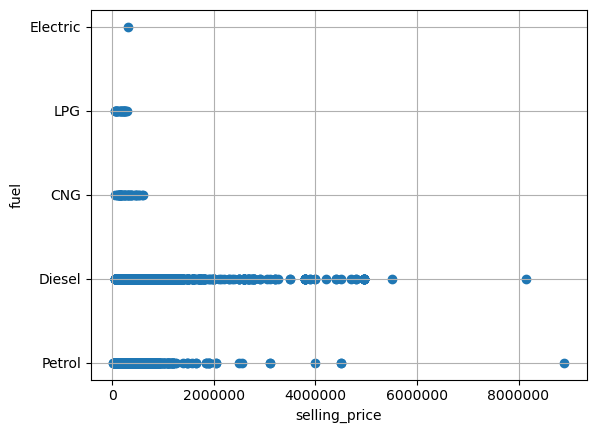

In [30]:
%matplotlib inline

plt.ticklabel_format(style='plain')
plt.scatter(data['selling_price'],data['fuel'])
plt.xlabel('selling_price')
plt.ylabel('fuel')
plt.grid()
plt.show()

In [ ]:
#